### Import cytview, pandas and matplotlib


In [1]:
import cytview as cv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read your experimental results into a pandas dataframe

In [2]:
"""
Read the dataset into python as a DataFrame object using pandas. An example dataset 
has been included within this project to assist with formatting the input table. In this
case "MetaData_Well" is our single-cell identifier and "Measurement_1" is the feature
we are interested in analysing. It is important that the measurements are numerical.
"""

df = pd.read_csv("dataset/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


### Plot and analyse your measurements of interest

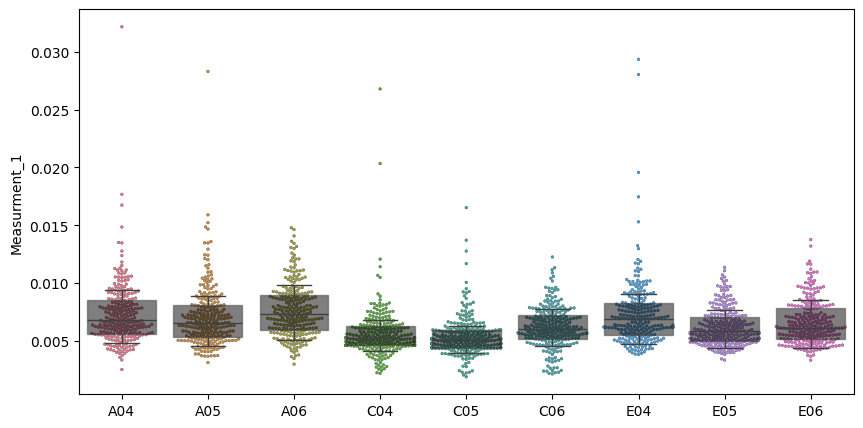

In [5]:
"""
Use cell_plot() to randomly sample a subset of experimental observations and plot the data.
CytView makes use of seaborn's swarmplot() and boxplot() functions and thus any plot-related
parameters can be tweaked using matplotlib. Note: the default number of observations sampled
is 500, this can be changed using the obs_max argument.
"""

plt.figure(figsize=[10,5])

plot = cv.cell_plot(df, measurement= "Measurement_1", size=2, identifier= "Metadata_Well", obs_max=250)
plt.ylabel("Measurment_1")
plt.show()

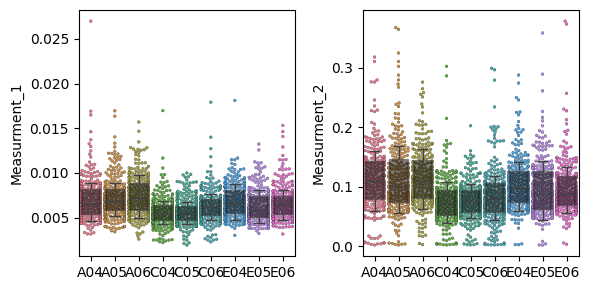

In [12]:
"""
Both cell_plot() and group_plot() can be provided a matplotlib axes object. These functions utilise seaborn's swarmplot() and boxplot() 
functions and is fed back into them on the backend.

"""
fig, axes = plt.subplots(1,2, figsize=[6,3])

plot = cv.cell_plot(df, measurement= "Measurement_1", size=2, identifier= "Metadata_Well", ax=axes[0], obs_max=250)
axes[0].set_ylabel("Measurment_1")

plot = cv.cell_plot(df, measurement= "Measurement_2", size=2, identifier= "Metadata_Well", ax=axes[1], obs_max=250)
axes[1].set_ylabel("Measurment_2")

plt.tight_layout()
plt.show()

In [ ]:
"""
cell_plot() returns a dictionary containing both the sampled dataframe and summarised results
"""

# show the sampled dataframe
plot["dataframe"]

In [ ]:
# summary of dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

### Analyse replicate data and perform statistical analysis

In [ ]:
"""
If you have replicate samples you can utilise the group_plot() function to merge, plot
and perform statistics on your dataset. Note: you need to specify at least 2 independent 
replicates in order to use this function.
"""

plt.figure(figsize=[3,5])


"""
Define your groupings as set out below. In this case we're interested in comparing wells
A04, A05, A06 versus C04, C05, C06 versus E04, E05, E06. 
"""
groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

# Provide user-defined labels for each grouping
labels = ["Sample 1", "Sample 2", "Sample 3"]

"""
Plot the data and specify the groupings and labels with the function arguments.
Note: set draw = True in order to draw lines between groups and visualise statistical significance. 
Significance is calculated for every sample against the first using Dunnett’s multiple comparison test.
"""

plot = cv.group_plot(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", 
                     groupings=groupings, labels = labels, size=2, draw=True, obs_max=1000)
plt.tight_layout()
plt.show()

### View the dataframe generated from replicates and output the summary data

In [ ]:
"""
View the grouped dataframe. Note: similarly to the cell_plot() function the data has been down-sampled. 
In order to adjust the number of observations sampled (default: 500) change the obs_max parameter.
"""

plot["dataframe"].head()

In [ ]:
# p_values and significance levels of comparisons
plot["stats"]

In [ ]:
# Summary of grouped dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

In [ ]:
"""
CytView also allows you to directly perform measurement extraction and down-sampling 
if you wish to independently analyse the data outside of python (eg. in R, SPSS, GraphPad, Excel)
"""

values = cv.extract_values(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", obs_max=1000)
values.head()